In [12]:
import matplotlib.pyplot as plt
from climakitae.core.data_interface import (
    get_data,
)
from climakitae.util.utils import add_dummy_time_to_wl
from renewable_data_load import *

In [5]:
resource = "pv"
module = "utility"
domain = "d03"
variable = "cf"
frequency = "day"
simulation = "all"
simulation = "ec-earth3"
scenario = "historical"

wrf_var = "Precipitation (total)"
wrf_simulation = sim_name_dict[simulation]
wrf_scenario = scenario_dict[scenario]
wrf_resolution = resolution_dict[domain]

wrfdat = get_data(
    variable=wrf_var,
    downscaling_method="Dynamical",
    resolution=wrf_resolution,
    timescale="daily",
    scenario=["Historical Climate", "SSP 3-7.0"],
)
wrfdat = wrfdat.sel(simulation=wrf_simulation)

/Users/work/miniconda3/envs/renewables-analysis/lib/python3.12/site-packages/climakitae/core/data_load.py:548: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  all_hist = xr.concat(
/Users/work/miniconda3/envs/renewables-analysis/lib/python3.12/site-packages/climakitae/core/data_load.py:589: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  one_scenario = xr.concat

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Returned data array is huge. Operations could take 10x to infinity longer than 1GB of data !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



In [6]:
WRF_sim_name = sim_name_dict[simulation]
model = WRF_sim_name.split("_")[1]
ensemble_member = WRF_sim_name.split("_")[2]
gwl = 0.8

start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl)
print(f"{simulation} {gwl}C: {start_year}-{end_year}")
# select data for gwl period
gwl_subset = wrfdat.sel(time=slice(f"{start_year}", f"{end_year}"))
gwl_subset = gwl_subset.expand_dims({"warming_level": [gwl]})

ec-earth3 0.8C: 1988-2017


In [7]:
wrf_var = "Precipitation (total)"
wrfdat_gwl = get_data(
    variable=wrf_var,
    downscaling_method="Dynamical",
    resolution=wrf_resolution,
    timescale="daily",
    approach="warming level",
    warming_level=[0.8],
)

/Users/work/miniconda3/envs/renewables-analysis/lib/python3.12/site-packages/climakitae/core/data_load.py:548: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  all_hist = xr.concat(
/Users/work/miniconda3/envs/renewables-analysis/lib/python3.12/site-packages/climakitae/core/data_load.py:589: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  one_scenario = xr.concat

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Returned data array is huge. Operations could take 10x to infinity longer than 1GB of data !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



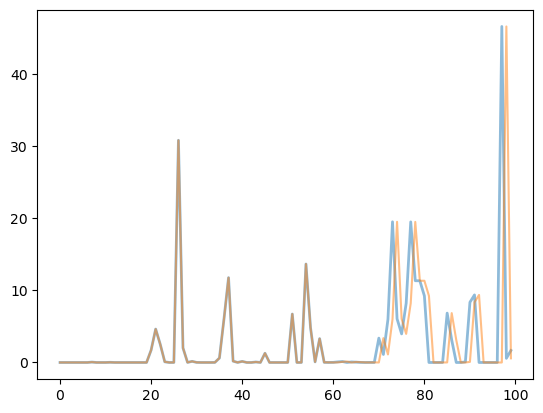

In [8]:
plt.plot(
    wrfdat_gwl.sel(simulation="WRF_EC-Earth3_r1i1p1f1_historical+ssp370")
    .isel(time_delta=slice(0, 100), x=200, y=250)
    .squeeze()
    .values,
    alpha=0.5,
    linewidth=2,
)
plt.plot(gwl_subset.isel(time=slice(0, 100), x=200, y=250).squeeze().values, alpha=0.5)

In [10]:
wrfdat_gwl

<xarray.DataArray np.str_('Precipitation (total)') (warming_level: 1,
                                                    time_delta: 10950, y: 472,
                                                    x: 223, simulation: 8)> Size: 37GB
dask.array<getitem, shape=(1, 10950, 472, 223, 8), dtype=float32, chunksize=(1, 339, 59, 27, 1), chunktype=numpy.ndarray>
Coordinates:
  * warming_level      (warming_level) float64 8B 0.8
  * x                  (x) float64 2kB -4.305e+06 -4.302e+06 ... -3.639e+06
  * y                  (y) float64 4kB 4.849e+05 4.879e+05 ... 1.898e+06
  * time_delta         (time_delta) float64 88kB -5.475e+03 ... 5.474e+03
    Lambert_Conformal  int32 4B 1
    lakemask           (y, x) float32 421kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    landmask           (y, x) float32 421kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    lat                (y, x) float32 421kB 30.35 30.37 30.38 ... 44.49 44.51
    lon                (y, x) float32 421kB -117.7 -117.7 ... -120.9 -120.9
    centered_year      (simulation) int64 64B 2005 2006 2003 ... 2012 1996 2011
  * simulation         (simulation) <U44 1kB 'WRF_CESM2_r11i1p1f1_historical+...
Attributes:
    variable_id:           prec
    extended_description:  Total precipitation. Computed by summing total gri...
    units:                 mm
    data_type:             Gridded
    resolution:            3 km
    frequency:             daily
    location_subset:       ['entire domain']
    approach:              Warming Level
    downscaling_method:    Dynamical
    warming_level_window:  +/- 15 years from centered year
    institution:           UCLA
    grid_mapping:          Lambert_Conformal

In [13]:
wrfdat_gwl_time = add_dummy_time_to_wl(wrfdat_gwl)

In [15]:
wrfdat_gwl_time

<xarray.DataArray np.str_('Precipitation (total)') (warming_level: 1,
                                                    time: 10950, y: 472,
                                                    x: 223, simulation: 8)> Size: 37GB
dask.array<getitem, shape=(1, 10950, 472, 223, 8), dtype=float32, chunksize=(1, 339, 59, 27, 1), chunktype=numpy.ndarray>
Coordinates:
  * warming_level      (warming_level) float64 8B 0.8
  * x                  (x) float64 2kB -4.305e+06 -4.302e+06 ... -3.639e+06
  * y                  (y) float64 4kB 4.849e+05 4.879e+05 ... 1.898e+06
    Lambert_Conformal  int32 4B 1
    lakemask           (y, x) float32 421kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    landmask           (y, x) float32 421kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    lat                (y, x) float32 421kB 30.35 30.37 30.38 ... 44.49 44.51
    lon                (y, x) float32 421kB -117.7 -117.7 ... -120.9 -120.9
    centered_year      (simulation) int64 64B 2005 2006 2003 ... 2012 1996 2011
  * simulation         (simulation) <U44 1kB 'WRF_CESM2_r11i1p1f1_historical+...
  * time               (time) datetime64[ns] 88kB 2000-01-01 ... 2029-12-31
Attributes:
    variable_id:           prec
    extended_description:  Total precipitation. Computed by summing total gri...
    units:                 mm
    data_type:             Gridded
    resolution:            3 km
    frequency:             daily
    location_subset:       ['entire domain']
    approach:              Warming Level
    downscaling_method:    Dynamical
    warming_level_window:  +/- 15 years from centered year
    institution:           UCLA
    grid_mapping:          Lambert_Conformal

In [17]:
gwl_subset

<xarray.DataArray np.str_('Precipitation (total)') (warming_level: 1,
                                                    scenario: 1, time: 10958,
                                                    y: 472, x: 223)> Size: 5GB
dask.array<getitem, shape=(1, 1, 10958, 472, 223), dtype=float32, chunksize=(1, 1, 1582, 59, 27), chunktype=numpy.ndarray>
Coordinates:
  * warming_level      (warming_level) float64 8B 0.8
  * time               (time) datetime64[ns] 88kB 1988-01-01 ... 2017-12-31
  * x                  (x) float64 2kB -4.305e+06 -4.302e+06 ... -3.639e+06
  * y                  (y) float64 4kB 4.849e+05 4.879e+05 ... 1.898e+06
    simulation         <U26 104B 'WRF_EC-Earth3_r1i1p1f1'
    Lambert_Conformal  int32 4B 1
    lakemask           (y, x) float32 421kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    landmask           (y, x) float32 421kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    lat                (y, x) float32 421kB 30.35 30.37 30.38 ... 44.49 44.51
    lon                (y, x) float32 421kB -117.7 -117.7 ... -120.9 -120.9
  * scenario           (scenario) <U22 88B 'Historical + SSP 3-7.0'
Attributes:
    variable_id:           prec
    extended_description:  Total precipitation. Computed by summing total gri...
    units:                 mm
    data_type:             Gridded
    resolution:            3 km
    frequency:             daily
    location_subset:       ['entire domain']
    approach:              Time
    downscaling_method:    Dynamical
    institution:           UCLA
    grid_mapping:          Lambert_Conformal

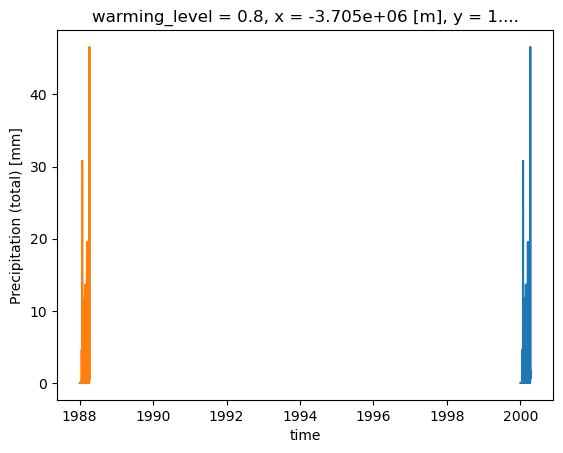

In [16]:
wrfdat_gwl_time.sel(simulation="WRF_EC-Earth3_r1i1p1f1_historical+ssp370").isel(time=slice(0, 100), x=200, y=250).plot()

gwl_subset.isel(time=slice(0, 100), x=200, y=250).squeeze().plot()

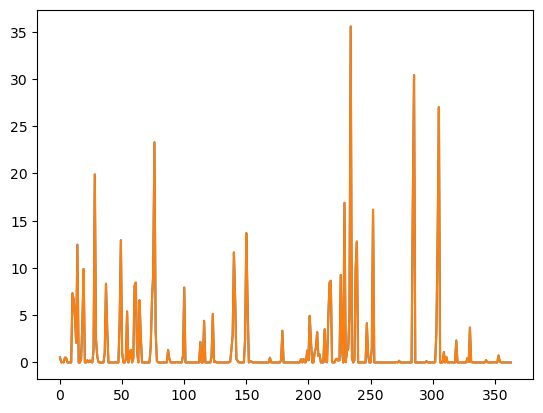

In [6]:
plt.plot(
    wrfdat_gwl.sel(simulation="WRF_EC-Earth3_r1i1p1f1_historical+ssp370")
    .isel(time_delta=slice(-365, -1), x=200, y=250)
    .squeeze()
    .values
)
plt.plot(gwl_subset.isel(time=slice(-365, -1), x=200, y=250).squeeze().values)